# Classification



## Introducion



In this homework, we're trying to achive some new knowledge about Classification. Classification in Statistical context is the act of Classifing a dataset to some predefined clusters, for example we know that we wanna split our dataset to two subdatasets or clusters, then we'll use some algo and methods to achieve this goal.

## Load and Cleanse Your Data

* First of all, we need to load data from our dataset and do some EDA on it. try to load data from the file you were given and then, Study your dataset. Describe dataset columns, find count of null rows and then report percentage of rows containing at least one null value, drop the cells or set a default for each column on your own. You can use mixed strategies to get better performanace too (bonus). Plot some charts to describe the dataset main features and guess what features will be more valueable for us. 

* Attention: You need to use your own creativity and search skills to prune and cleanse your dataset to achieve better results on next parts. Usually what is done in this part is Removing redundant rows, Replacing missed values with some new values such as mean of the column or a default value. Running some basic statistical measures on columns such as mean or variance to get sense about dataset and also normalizing some columns, you can use **Min Max Normalization** and **Gaussian Normalization**. for more information check links bellow. A critical task that must be done in EDA is plotting. Try to plot what you need. don't forget, NUMBERS CAN'T TALK!


1.   [Min-max normalization](https://www.codecademy.com/articles/normalization#:~:text=Min%2Dmax%20normalization%20is%20one,decimal%20between%200%20and%201.&text=That%20data%20is%20just%20as%20squished%20as%20before!)
2.   [what, why and how of feature scaling-normalization & standardization](https://towardsdatascience.com/clearly-explained-what-why-and-how-of-feature-scaling-normalization-standardization-e9207042d971)
3. [Data Normalization in Data Mining](https://www.geeksforgeeks.org/data-normalization-in-data-mining/)


* You have to split your dataset into train and test and be careful, DON'T TOUCH YOUR TEST DATASET

In [114]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install dtreeviz

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns # use for draw normal distribution curve
import matplotlib.pyplot as plt
import sklearn
import math
import scipy.stats as stats

In [127]:
from sklearn.model_selection import train_test_split
def replace_text_with_num(cols,data):
  for i in cols:
    d = dict()
    count = 0
    for j in data[i]:
      if d.get(j,None) == None:
        d[j] = count
        count+=1
    data[i] = data[i].map(d)
  return data
data= pd.read_csv("dataset.csv")
data = data.drop(columns =data.columns[[0, 1,2]], axis=1 )

simple_cols = ["Geography","Gender"]
all_features = list(data.columns.values.tolist())
all_features.remove("Exited")
not_gussian_features = ["Geography","Gender","HasCrCard","IsActiveMember","Tenure","NumOfProducts"]
gussian_features  = [e for e in all_features if e not in not_gussian_features]
data = replace_text_with_num(simple_cols,data)
train_set,test_set = train_test_split(data, train_size=0.8,test_size=0.2)
print("number off null and unvalid in each cols: ")
print(data.isnull().sum())
print("all values in columns are valid values")
data.head()


number off null and unvalid in each cols: 
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
all values in columns are valid values


CreditScore  Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619          0       0  ...               1        101348.88       1
1          608          1       0  ...               1        112542.58       0
2          502          0       0  ...               0        113931.57       1
3          699          0       0  ...               0         93826.63       0
4          850          1       0  ...               1         79084.10       0

[5 rows x 11 columns]

<div dir = "rtl" "font-size:30px"> 
ÿØÿ± ÿß€åŸÜ ÿ®ÿÆÿ¥ ŸÖŸÇÿßÿØ€åÿ± ÿ∫€åÿ± ÿπÿØÿØ€å ÿ±ÿß ÿ®ÿß ÿπÿØÿØ ÿ¨ÿß€å⁄Øÿ≤€åŸÜ ⁄©ÿ±ÿØŸá ÿß€åŸÖ ŸáŸÖ⁄ÜŸÜ€åŸÜ ÿØŸÇÿ™ ⁄©ŸÜ€åÿØ ⁄©Ÿá ŸÜÿ±ŸÖÿßŸÑ
 ÿ≥ÿßÿ≤€å ÿ≥ÿ™ŸàŸÜ Ÿáÿß ÿ®ÿØŸÑ€åŸÑ‚Äå ÿ¢ŸÜ⁄©Ÿá ŸÖŸÇÿßÿØ€åÿ± ÿ®ÿ≥€åÿßÿ± ⁄©Ÿà⁄Ü⁄© ŸÖ€å‚Äåÿ¥ÿØŸÜÿØ ÿßŸÜÿ¨ÿßŸÖ ŸÜÿ¥ÿØŸá ÿßŸÖÿß ÿØÿ± ÿ®ÿÆÿ¥  train
 ÿß€åŸÜ ⁄©ÿßÿ± ÿµŸàÿ±ÿ™ ⁄Øÿ±ŸÅÿ™Ÿá ÿßÿ≥ÿ™. ⁄©Ÿá ÿØÿ± ÿ¢ŸÜ ÿ®ÿÆÿ¥ ÿ™Ÿàÿ∂€åÿ≠ ŸÖ€å‚ÄåÿØŸá€åŸÖ. ÿØÿ± ŸÇÿ≥ŸÖÿ™ ÿ≤€åÿ± ŸÜ€åÿ≤ ÿßÿ∑ŸÑÿßÿπÿßÿ™ ÿ≥ÿ™ŸàŸÜ Ÿáÿßÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸá€åŸÖ.

</div>



<div style="direction:rtl;line-height:100%;">
	<font face="XB Niloofar" size=5>
ÿØÿ± ÿß€åŸÜ ÿ®ÿÆÿ¥ ŸÖŸÇÿßÿØ€åÿ± ÿ∫€åÿ± ÿπÿØÿØ€å ÿ±ÿß ÿ®ÿß ÿπÿØÿØ ÿ¨ÿß€å⁄Øÿ≤€åŸÜ ⁄©ÿ±ÿØŸá ÿß€åŸÖ ŸáŸÖ⁄ÜŸÜ€åŸÜ ÿØŸÇÿ™ ⁄©ŸÜ€åÿØ ⁄©Ÿá ŸÜÿ±ŸÖÿßŸÑ
 ÿ≥ÿßÿ≤€å ÿ≥ÿ™ŸàŸÜ Ÿáÿß ÿ®ÿØŸÑ€åŸÑ‚Äå ÿ¢ŸÜ⁄©Ÿá ŸÖŸÇÿßÿØ€åÿ± ÿ®ÿ≥€åÿßÿ± ⁄©Ÿà⁄Ü⁄© ŸÖ€å‚Äåÿ¥ÿØŸÜÿØ ÿßŸÜÿ¨ÿßŸÖ ŸÜÿ¥ÿØŸá ÿßŸÖÿß ÿØÿ±  ÿ®ÿÆÿ¥ ÿ™ÿ±€åŸÜ 
 ÿß€åŸÜ ⁄©ÿßÿ± ÿµŸàÿ±ÿ™ ⁄Øÿ±ŸÅÿ™Ÿá ÿßÿ≥ÿ™. ⁄©Ÿá ÿØÿ± ÿ¢ŸÜ ÿ®ÿÆÿ¥ ÿ™Ÿàÿ∂€åÿ≠ ŸÖ€å‚ÄåÿØŸá€åŸÖ. ÿØÿ± ŸÇÿ≥ŸÖÿ™ ÿ≤€åÿ± ŸÜ€åÿ≤ ÿßÿ∑ŸÑÿßÿπÿßÿ™ ÿ≥ÿ™ŸàŸÜ Ÿáÿßÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸá€åŸÖ.
        </font>
    </div>


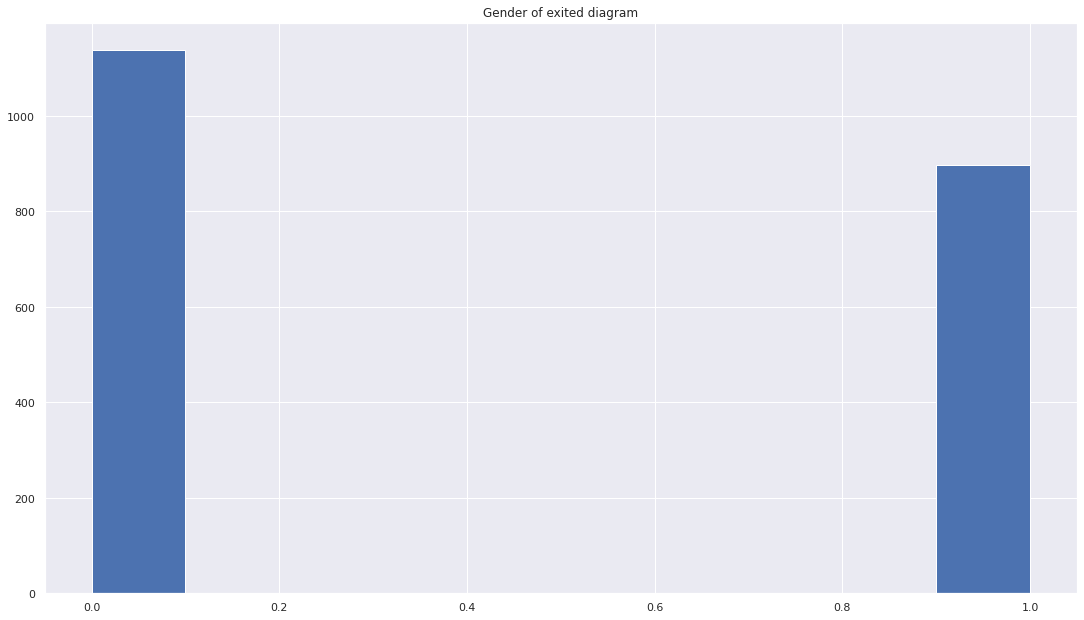

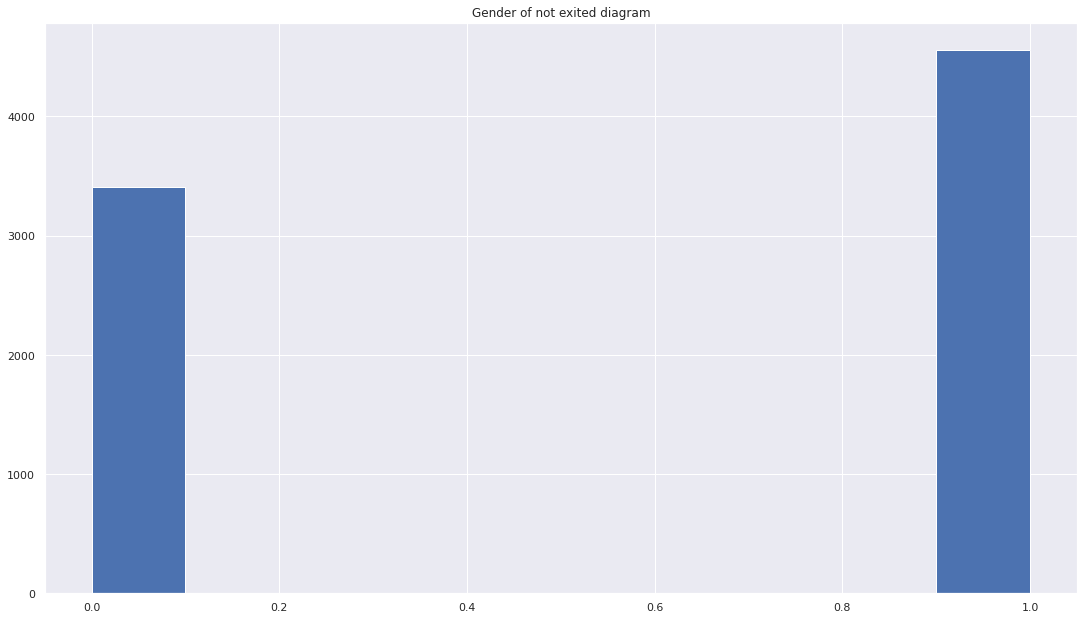

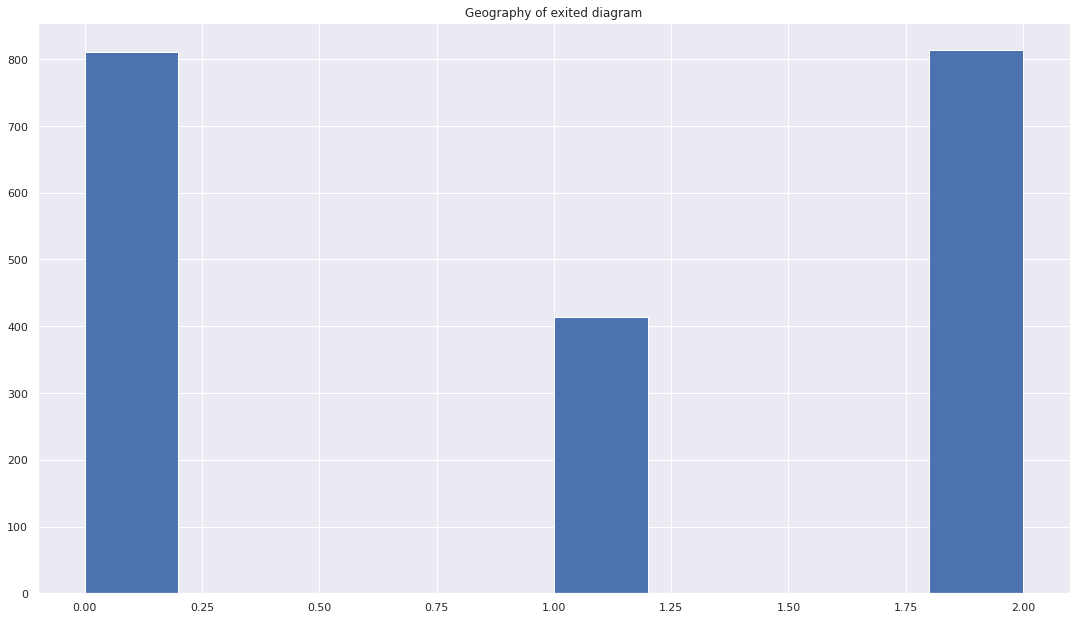

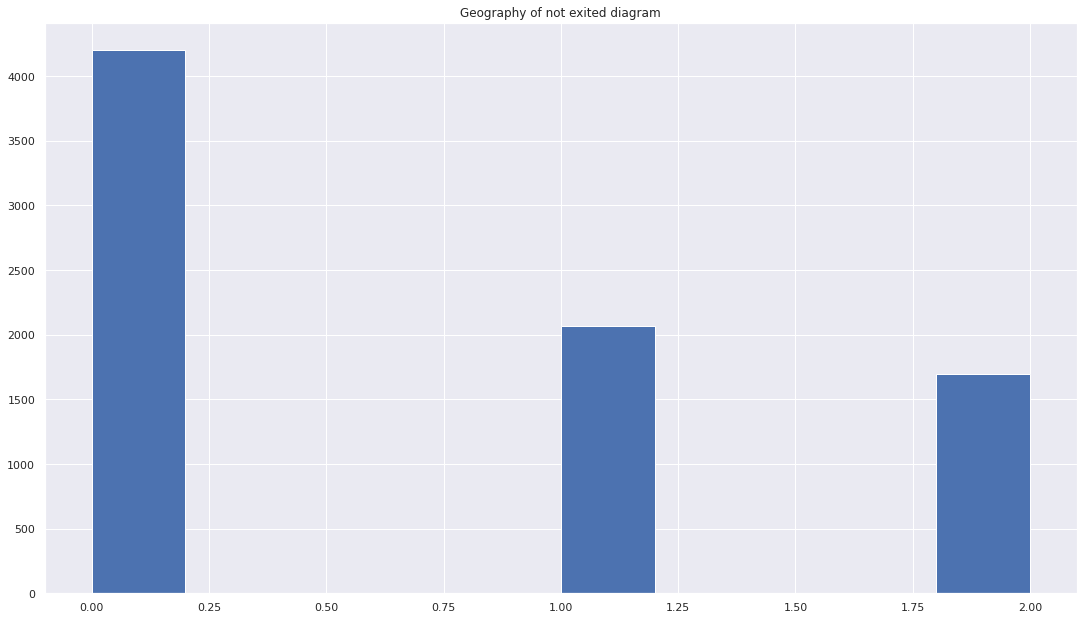

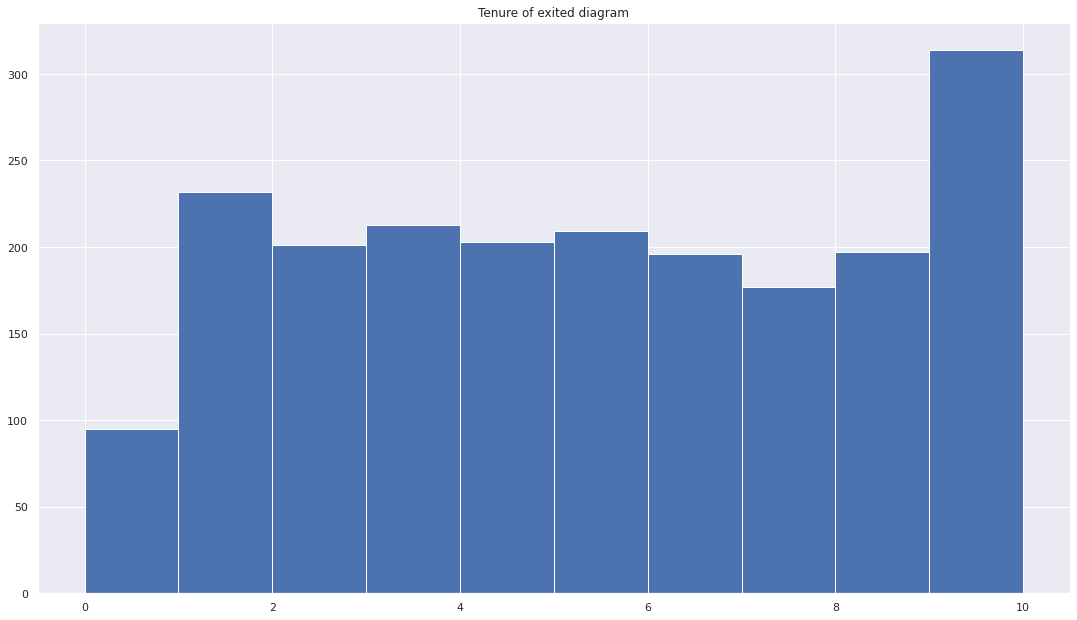

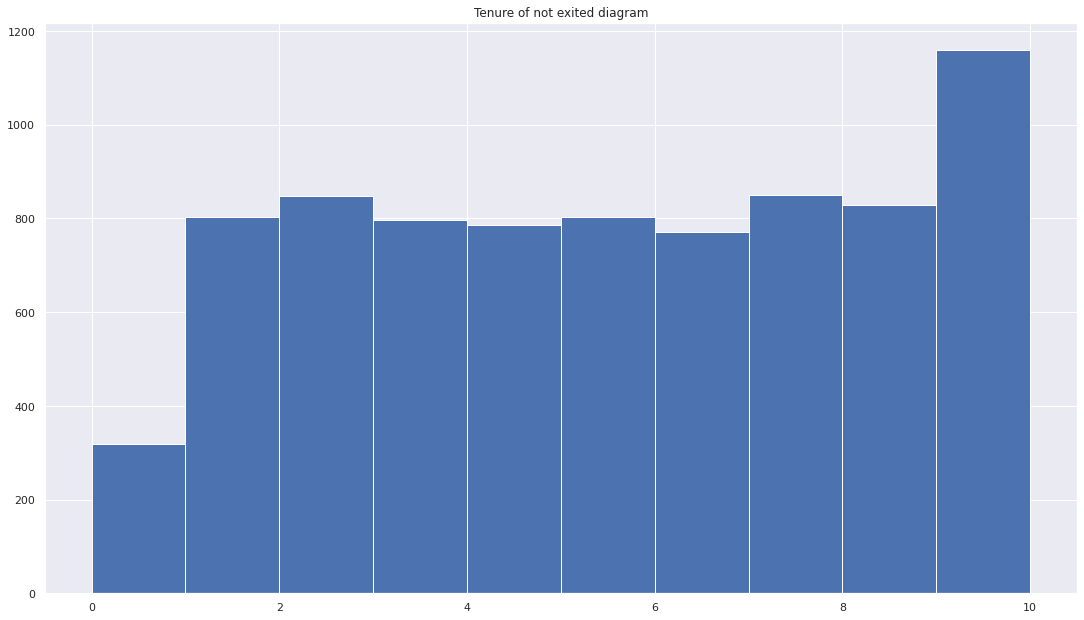

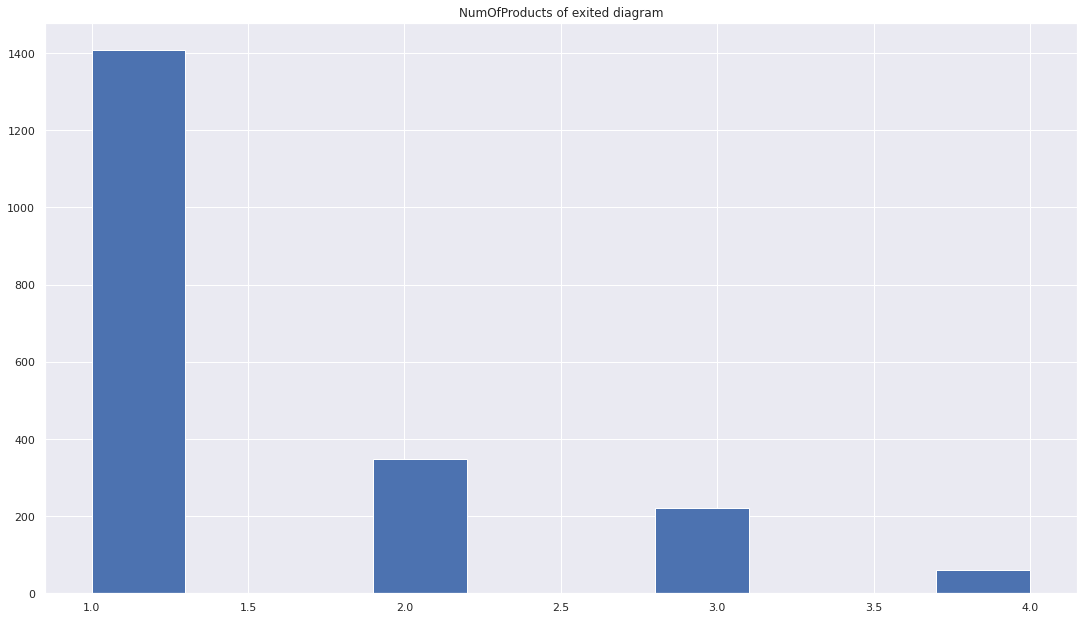

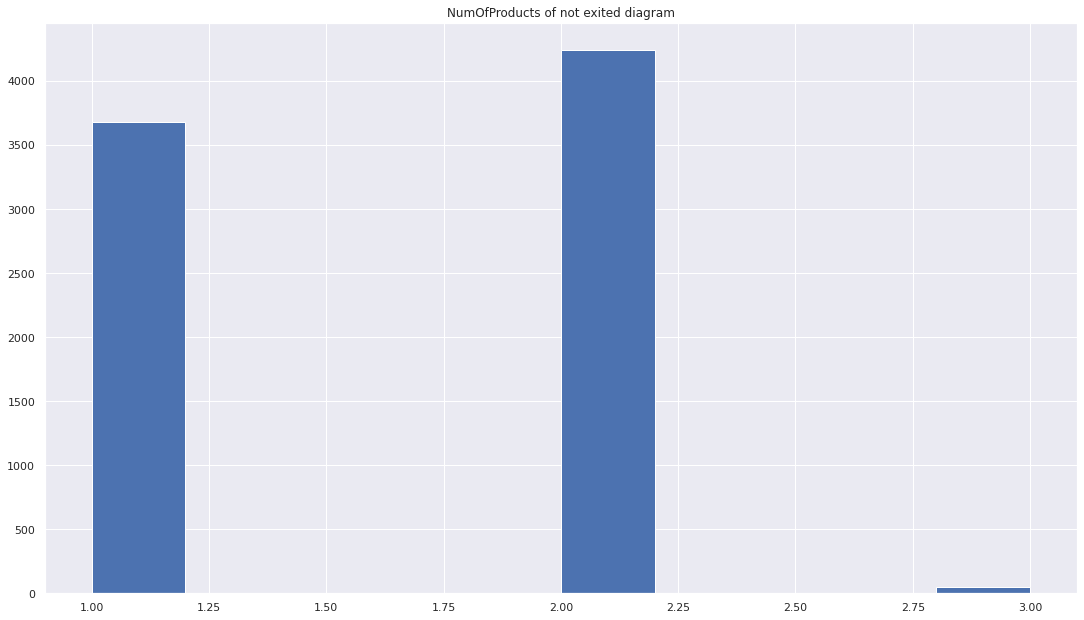

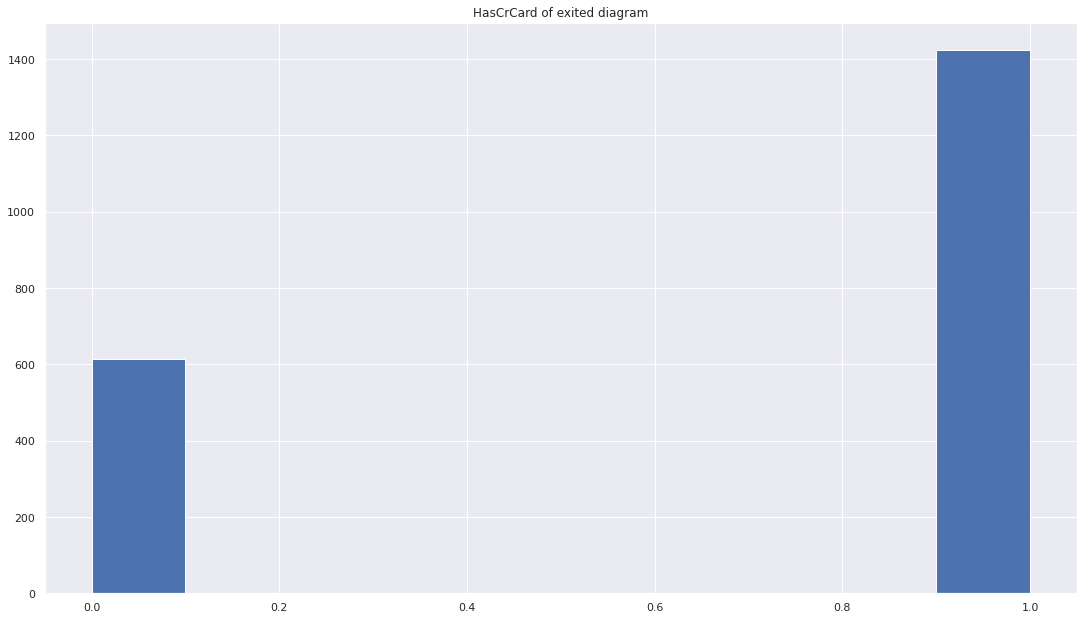

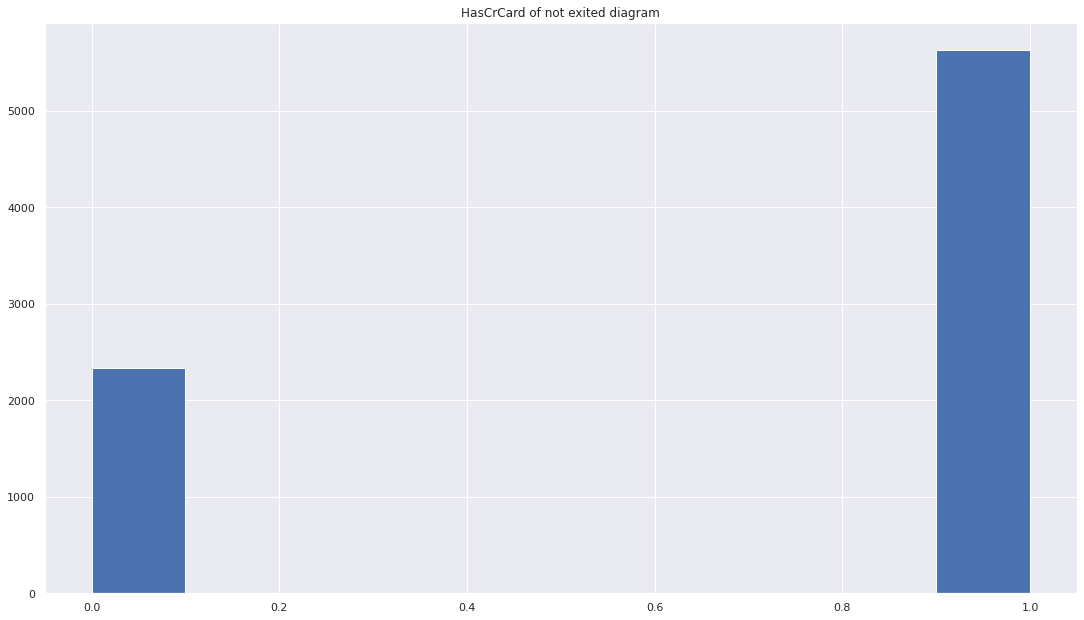

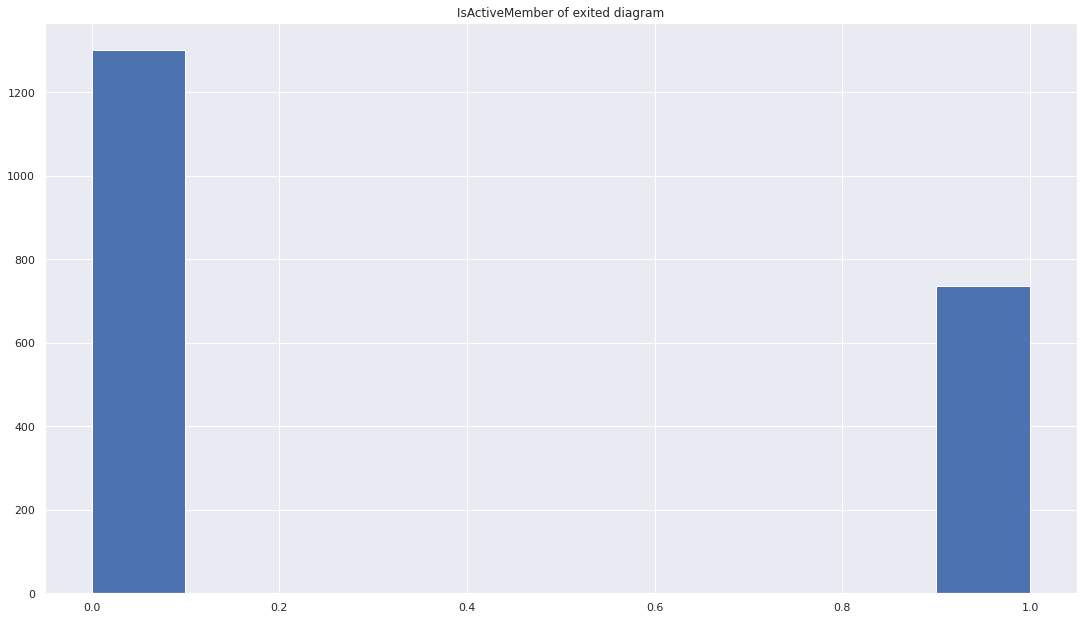

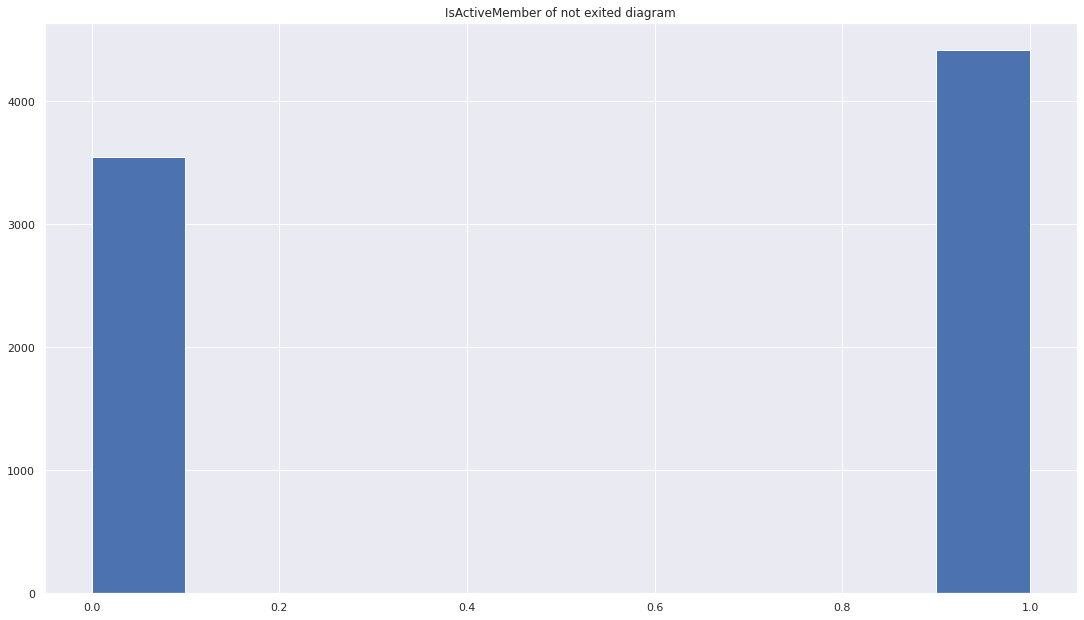

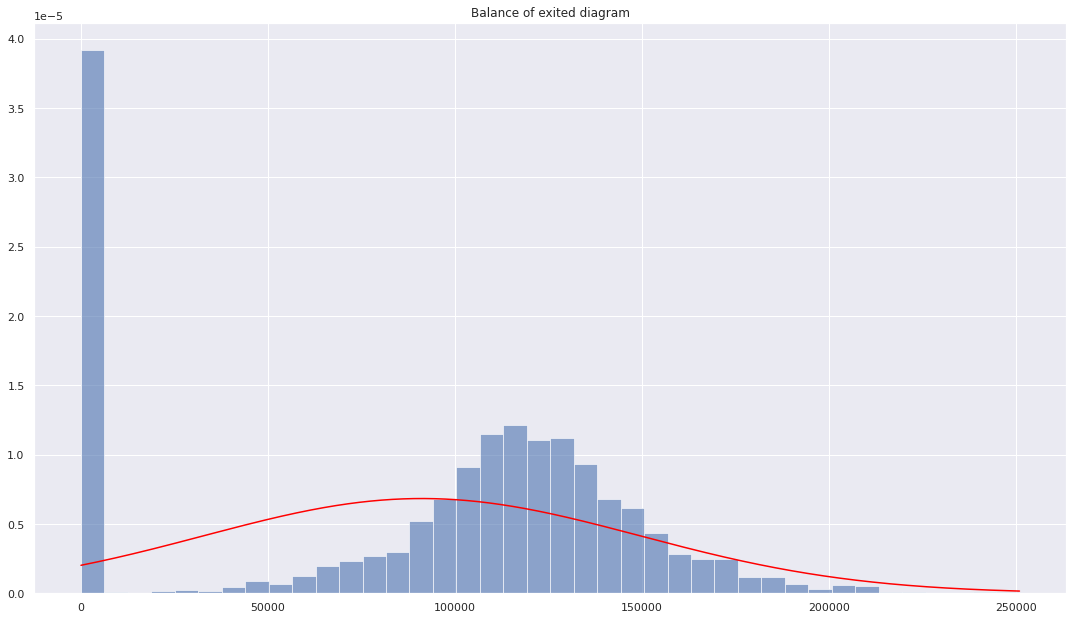

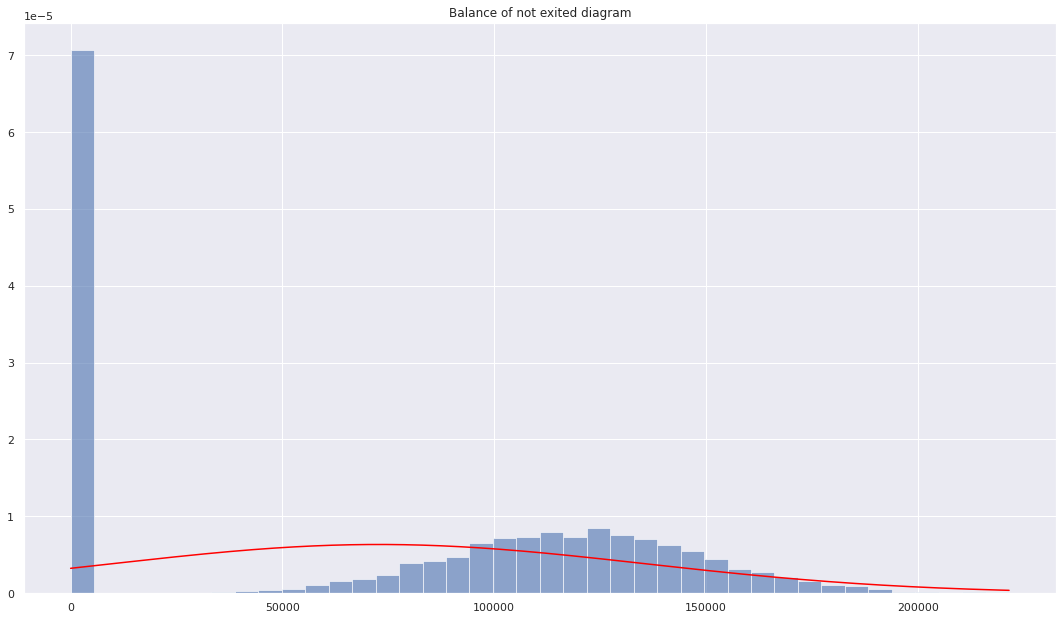

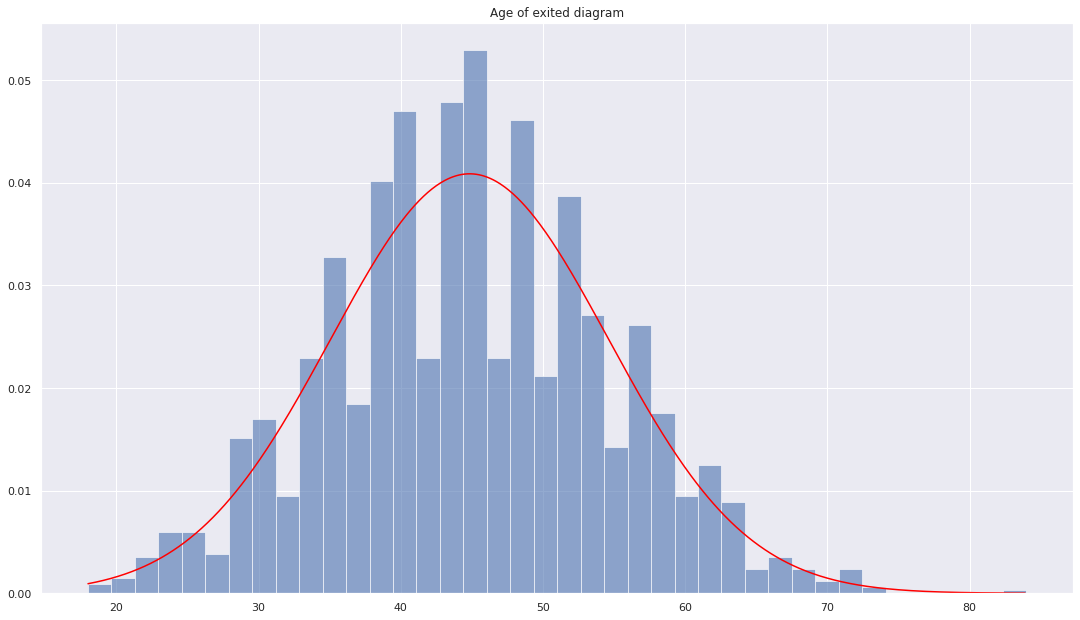

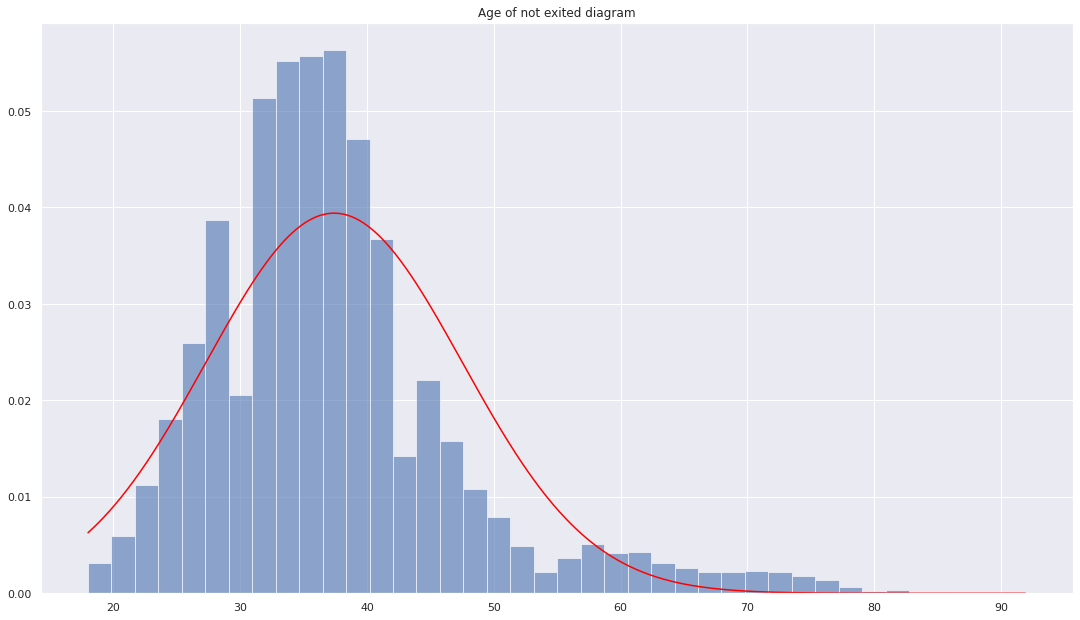

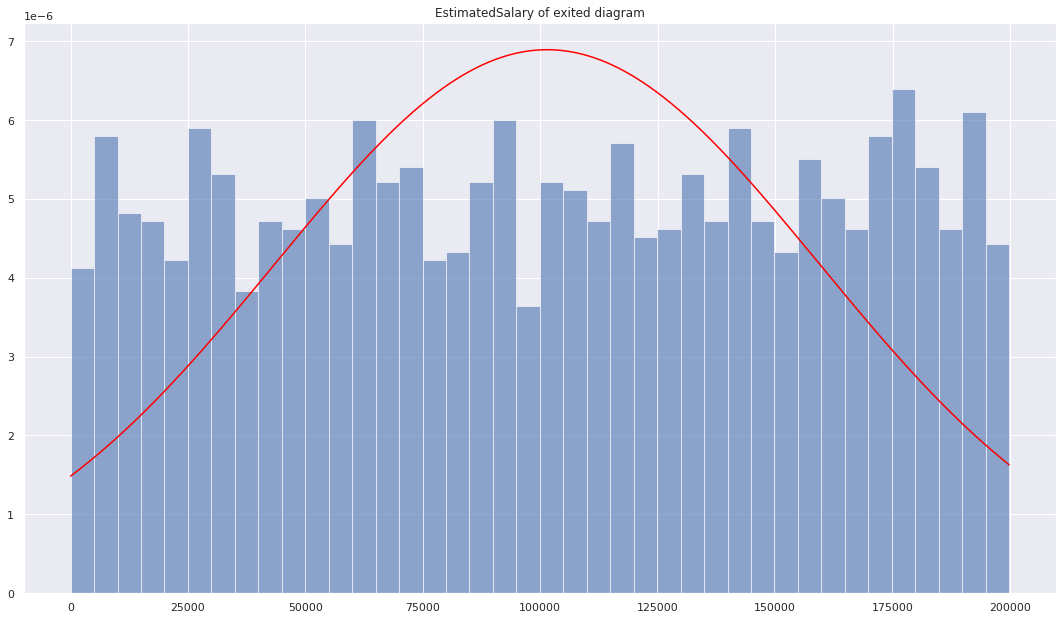

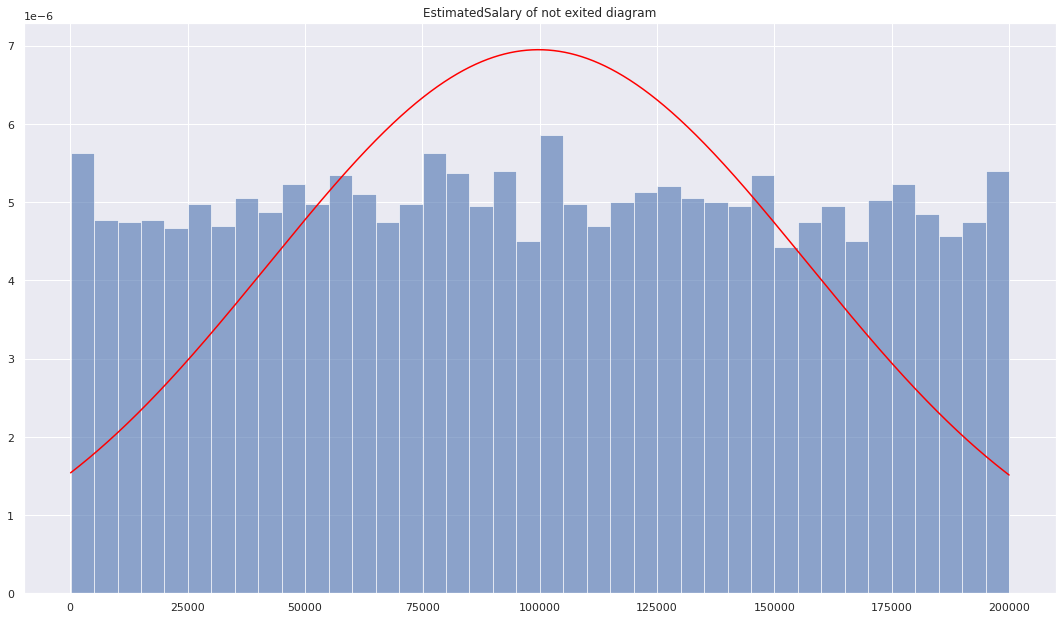

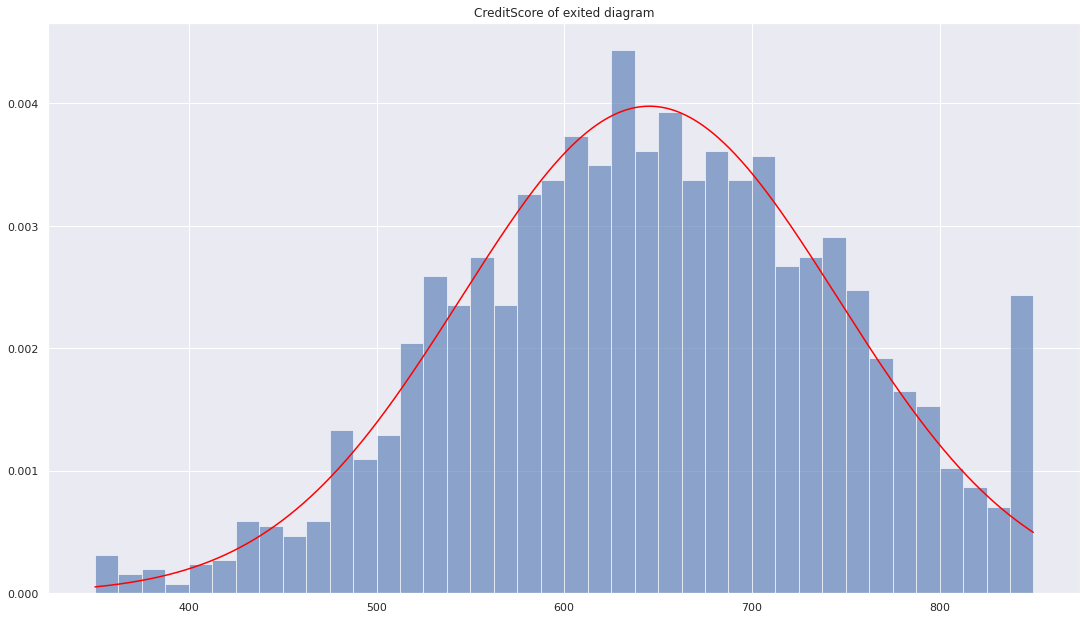

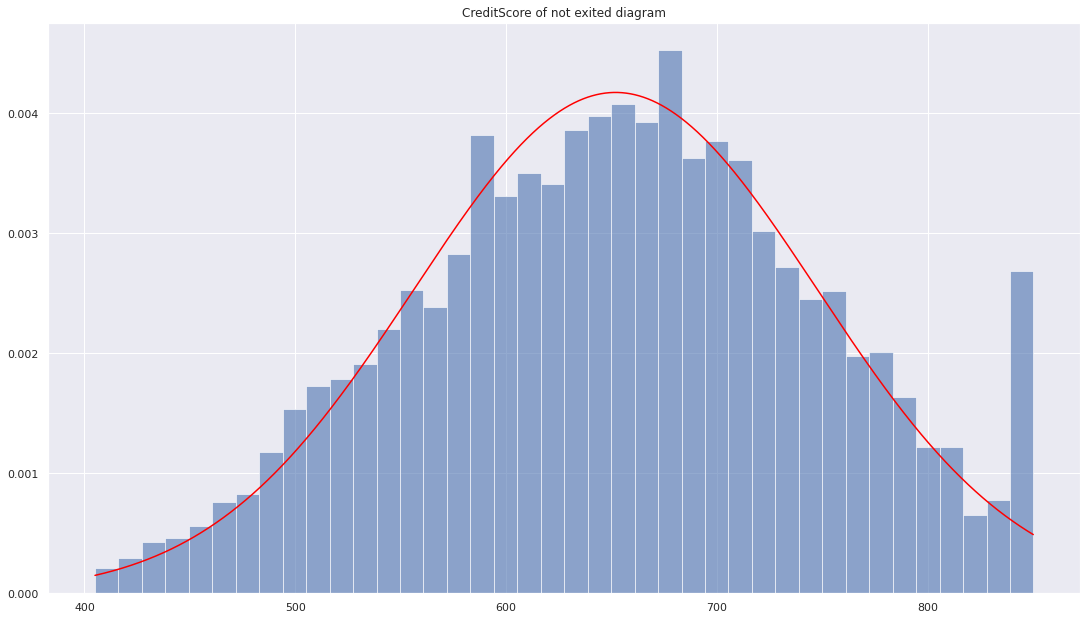

In [117]:
def draw_hist_norm(array,title,is_it_gussian = True):
  plt.title(title)
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  if is_it_gussian:
    plt.hist(array, bins=40, density=True, alpha=0.6, color='b')
    mean = array.mean()
    standard_deviation = array.std()
    x_values = np.arange(array.min(), array.max(), 0.1)
    y_values = stats.norm(mean, standard_deviation)
    plt.plot(x_values, y_values.pdf(x_values),color = "red")
    plt.show()
  else:
    plt.hist(array,stacked = True)
    plt.show()

data_exited = data[data["Exited"] == 1]
data_notexited = data[data["Exited"] == 0]

draw_hist_norm(data_exited["Gender"],"Gender of exited diagram",False)
draw_hist_norm(data_notexited["Gender"],"Gender of not exited diagram",False)

draw_hist_norm(data_exited["Geography"],"Geography of exited diagram",False)
draw_hist_norm(data_notexited["Geography"],"Geography of not exited diagram",False)


draw_hist_norm(data_exited["Tenure"],"Tenure of exited diagram",False)
draw_hist_norm(data_notexited["Tenure"],"Tenure of not exited diagram",False)

draw_hist_norm(data_exited["NumOfProducts"],"NumOfProducts of exited diagram",False)
draw_hist_norm(data_notexited["NumOfProducts"],"NumOfProducts of not exited diagram",False)

draw_hist_norm(data_exited["HasCrCard"],"HasCrCard of exited diagram",False)
draw_hist_norm(data_notexited["HasCrCard"],"HasCrCard of not exited diagram",False)

draw_hist_norm(data_exited["IsActiveMember"],"IsActiveMember of exited diagram",False)
draw_hist_norm(data_notexited["IsActiveMember"],"IsActiveMember of not exited diagram",False)


draw_hist_norm(data_exited["Balance"],"Balance of exited diagram",True)
draw_hist_norm(data_notexited["Balance"],"Balance of not exited diagram",True)


draw_hist_norm(data_exited["Age"],"Age of exited diagram",True)
draw_hist_norm(data_notexited["Age"],"Age of not exited diagram",True)


draw_hist_norm(data_exited["EstimatedSalary"],"EstimatedSalary of exited diagram",True)
draw_hist_norm(data_notexited["EstimatedSalary"],"EstimatedSalary of not exited diagram",True)

draw_hist_norm(data_exited["CreditScore"],"CreditScore of exited diagram",True)
draw_hist_norm(data_notexited["CreditScore"],"CreditScore of not exited diagram",True)



<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=5>
ŸáŸÖÿßŸÜÿ∑Ÿàÿ± ⁄©Ÿá ŸÖ€åÿ®€åŸÜ€åÿØ ÿØÿßÿØŸá Ÿáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá Ÿáÿ± ÿ≥ÿ™ŸàŸÜ ÿ®Ÿá ÿØŸà ÿØÿ≥ÿ™Ÿá ÿÆÿßÿ±ÿ¨ ÿ¥ÿØŸá Ÿà ŸÜÿ¥ÿØŸá ÿ™ŸÇÿ≥€åŸÖ ÿ¥ÿØŸá ÿßŸÜÿØ Ÿà ÿ®ÿ±ÿß€å Ÿáÿ± ÿ≥ÿ™ŸàŸÜ ŸÜŸÖŸàÿØÿßÿ± Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ ÿ¢ŸÜÿ±ÿß ⁄©ÿ¥€åÿØŸá ÿß€åŸÖ ÿØÿ± ÿ®ÿπÿ∂€å ÿßÿ≤ ÿØÿßÿØŸá Ÿáÿß €å⁄© ŸÖŸÜÿ≠ŸÜ€å ŸÇÿ±ŸÖÿ≤ ÿ±ŸÜ⁄Ø ŸÜ€åÿ≤ Ÿàÿ¨ŸàÿØ ÿØÿßÿ±ÿØ ⁄©Ÿá ŸÜŸÖŸàÿØÿßÿ± ÿ™Ÿàÿ≤€åÿπ ⁄ØŸàÿ≥€å ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ Ÿà ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÜ ÿ≥ÿ™ŸàŸÜ ÿßÿ≥ÿ™ ŸáŸÖÿßŸÜÿ∑Ÿàÿ± ⁄©Ÿá ŸÖ€åÿ®€åŸÜ€åÿØ ÿ®ÿπÿ∂€å ÿßÿ≤ ÿ¢ŸÜ Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ Ÿáÿß ÿ±ÿß ŸÜŸÖ€å‚Äåÿ™ŸàÿßŸÜ ÿ®Ÿá ÿ™Ÿàÿ≤€åÿπ ⁄ØŸàÿ≥€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ≥ÿßÿÆÿ™ ÿßŸÖÿß ⁄ÜŸàŸÜ ŸÖŸÇÿßÿØ€åÿ±  Ÿæ€åŸàÿ≥ÿ™Ÿá ÿßŸÜÿØ ⁄Üÿßÿ±Ÿá ÿß€å ÿ¨ÿ≤ ⁄ØŸàÿ≥€å ÿØÿ± ŸÜÿ∏ÿ± ⁄Øÿ±ŸÅÿ™ŸÜÿ¥ÿßŸÜ ŸÜÿØÿßÿ±€åŸÖ.

## Evalution Metrics

To see how you perfomed you need to use some evaluation. For this part you need to use f1_score, recall and precision to check how well your model has perfomed. Feel free to use any library. (we recommend you to use sklearn) 

In [128]:
# Your Code Here
#seperate data classses:
train_exited = train_set[train_set["Exited"] == 1]
train_notexited = train_set[train_set["Exited"] == 0]
# get number of each discrete features
info_dict = dict()
for i in not_gussian_features:
  info_dict[i] = max(data[i])
p_exited = len(train_exited)/len(train_set)
#summurize data set and summurize data classes and find prob at once
class Model:
  def train_model(self):
    size_exited = len(self.train_exited)
    size_notexited = len(self.train_notexited)
    #train 
    for i in self.not_gussian_features:
      temp = []
      temp_not = []
      num = self.info_dict[i]+1
      k = self.k
      for j in range(num):
        temp.append((k+sum(self.train_exited[i] == j))/(size_exited+k*num))
        temp_not.append((k+sum(self.train_notexited[i] == j))/(k*num+size_notexited))
      self.dfe[i] = temp
      self.dfn[i] = temp_not
    for i in gussian_features:
      self.gfe[i] = (self.train_exited[i].mean(),self.train_exited[i].std())
      self.gfn[i] = (self.train_notexited[i].mean(),self.train_notexited[i].std())
  def __init__(self,info_dict,train_exited,train_notexited,not_gussian_features,gussian_features,p_exited,k):
    self.k = k
    self.info_dict = info_dict
    self.train_exited = train_exited
    self.train_notexited = train_notexited
    self.not_gussian_features = not_gussian_features
    self.gussian_features = gussian_features
    self.gfe = dict()
    self.gfn = dict()
    self.dfe = dict()
    self.dfn = dict()
    self.p = p_exited
  def log_norm(self,info,x):
   mu,sigma = info
   a = ((x) - mu)/math.sqrt(2*sigma**2)
   b = -math.log(math.sqrt(2*math.pi) + sigma)
   return a+b
  def create_row(self,row):
    return{"CreditScore":row[0],"Geography":row[1],"Gender":row[2],"Age":row[3],"Tenure":row[4],"Balance":row[5],"NumOfProducts":row[6],"HasCrCard":row[7],
           "IsActiveMember":row[8],
           "EstimatedSalary":row[9],
           "Exited":row[10]}
  def predict(self,row):
    row = self.create_row(row)
    sum1  = 0
    sum2 = 0
    for i in self.not_gussian_features:
      index = int(row[i])
      sum2+= math.log(self.dfe[i][index])
      sum1+= math.log(self.dfn[i][index])
    for i in self.gussian_features:
      sum2 += self.log_norm(self.gfe[i],row[i])
      sum1 += self.log_norm(self.gfn[i],row[i])
      if math.log(1-self.p)+sum1 > math.log(self.p)+sum2:
        return 0
      else:
        return 1


## Naive Bayes

Now we're going to run some classification methods on our dataset. In this part, you must implement naive bayes classifier from scratch and run it on your train dataset. Describe what you've done in a short paragraph. 

*  You need to implement naive bayes model to predict the target value. 
*  You are not allowed to use libraries and have to implement from scratch

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=4>
  ÿ®Ÿá ÿ≥ÿßÿØ⁄Ø€å €å⁄© ŸÖÿØŸÑ ÿ®€åÿ≤ ÿ±ÿß ÿ®ÿ±ÿß€å ÿß€åŸÜ ŸÖÿ¨ŸÖŸàÿπŸá ÿ∑ÿ±ÿßÿ≠€å ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ ÿ®ÿ±ÿß€å Ÿà€å⁄ò⁄Ø€å Ÿáÿß€å€å ⁄©Ÿá ⁄ØŸàÿ≥€å ÿØÿ± ŸÜÿ∏ÿ± ⁄Øÿ±ŸÅÿ™€åŸÖÿ¥ÿßŸÜ €å⁄© ŸÖ€åÿßŸÜ⁄Ø€åŸÜ Ÿà ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± ÿØÿ± ŸÖÿØŸÑ (ÿ¨ÿØÿßŸàŸÑ ÿßÿ≥ÿ™ŸÇŸÑÿßŸÑ ÿ¥ÿ±ÿ∑€å) Ÿà ÿ®ÿ±ÿß€å 
ÿ™Ÿàÿ≤€åÿπ Ÿáÿß€å ÿ∫€åÿ± ⁄ØŸàÿ≥€å ÿßÿ≠ÿ™ŸÖÿßŸÑ ÿ±ÿß ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÜŸÖŸàÿØŸá ÿß€åŸÖ ÿ®ÿß €å⁄© 
<div dir ="ltr">
laplace smoothing with number k

</div>
⁄©Ÿá ŸÖŸÇÿØÿßÿ± ÿ±ÿß ÿ®ÿ±ÿßÿ®ÿ± €± ŸÇÿ±ÿßÿ± ÿØÿßÿØŸá ÿß€åŸÖ.


In [129]:
def visualize_result(y_true,y_pred,title):
  from sklearn.metrics import confusion_matrix
  import seaborn as sn
  cm = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cm, range(2), range(2))
  plt.figure(figsize=(10,7))
  sn.set(font_scale=1) # for label size
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 20},fmt="d",cmap="YlGnBu") # font size
  from sklearn.metrics import classification_report
  from sklearn.metrics import f1_score,recall_score,precision_score
  target_names = ['class 0', 'class 1']
  print("f1_score for "+title+" is :{}%".format(f1_score(y_true=y_true , y_pred= y_pred)))
  print("recall_score for "+title+" is :{}%".format(recall_score(y_true=y_true , y_pred= y_pred)))
  print("precision_score for "+title+" is :{}%".format(precision_score(y_true=y_true , y_pred= y_pred)))
  print(classification_report(y_true, y_pred, target_names=target_names))


my naive bayes model accuracy =  81.65 %
f1_score for my naive bayes is :0.3088512241054614%
recall_score for my naive bayes is :0.20246913580246914%
precision_score for my naive bayes is :0.6507936507936508%
              precision    recall  f1-score   support

     class 0       0.83      0.97      0.89      1595
     class 1       0.65      0.20      0.31       405

    accuracy                           0.82      2000
   macro avg       0.74      0.59      0.60      2000
weighted avg       0.79      0.82      0.78      2000



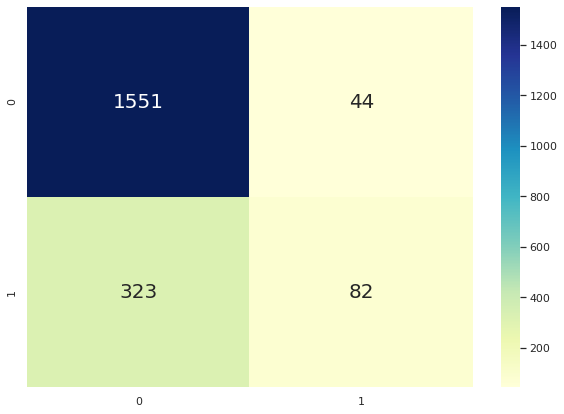

In [133]:
naive = Model(info_dict,train_exited,train_notexited,not_gussian_features,gussian_features,p_exited,1)
naive.train_model()
main_value = test_set["Exited"]
predicted = []
for index,row in test_set.iterrows():
   predicted.append(naive.predict(row))
print("my naive bayes model accuracy = ", str(100*sum(predicted == main_value)/len(main_value)) + " %")
visualize_result(main_value,predicted,"my naive bayes")



<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=5>
ŸÜÿ™ÿß€åÿ¨ ÿÆŸàÿßÿ≥ÿ™Ÿá ÿ¥ÿØŸá ÿ±ÿß ŸÜÿ¥ÿßŸÜ ÿØÿßÿØŸá ÿß€åŸÖ ŸáŸÖÿßŸÜÿ∑Ÿàÿ± ⁄©Ÿá ÿØÿ± ŸÇÿ≥ŸÖÿ™ ÿ®ÿπÿØ ÿÆŸàÿßŸá€åÿØ ÿØ€åÿØ ÿπŸÖŸÑ⁄©ÿ±ÿØ ŸÖÿØŸÑ ŸÖÿß ÿ®Ÿáÿ™ÿ± ÿßÿ≤ ÿπŸÖŸÑ⁄©ÿ±ÿØ ⁄©ÿ™ÿßÿ® ÿÆÿßŸÜŸá ÿßŸÖÿßÿØŸá Ÿà ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ €å⁄© ÿ¥ÿ®⁄©Ÿá ÿ®€åÿ≤ ⁄ØŸàÿ≥€å ÿßÿ≥ÿ™ . ÿ≤€åÿ±ÿß Ÿáÿ± ÿØŸà ÿÆÿ∑ÿß€å ŸÜŸàÿπ ÿßŸàŸÑ Ÿà ŸÜŸàÿπ ÿØŸàŸÖ ÿ¢ŸÜ ⁄©ŸÖÿ™ÿ± ÿßÿ≥ÿ™.

#### Evaluate Your model

In [134]:
from sklearn.model_selection import train_test_split
data= pd.read_csv("dataset.csv")
data = replace_text_with_num(simple_cols,data)
y = data["Exited"]
X= data.drop(columns =data.columns[[0, 1,2,13]], axis=1 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

GNB result accuracy =  :  78.5 %
f1_score for GNB is :0.14%
recall_score for GNB is :0.0857843137254902%
precision_score for GNB is :0.3804347826086957%
              precision    recall  f1-score   support

     class 0       0.80      0.96      0.88      1592
     class 1       0.38      0.09      0.14       408

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.51      2000
weighted avg       0.72      0.79      0.73      2000



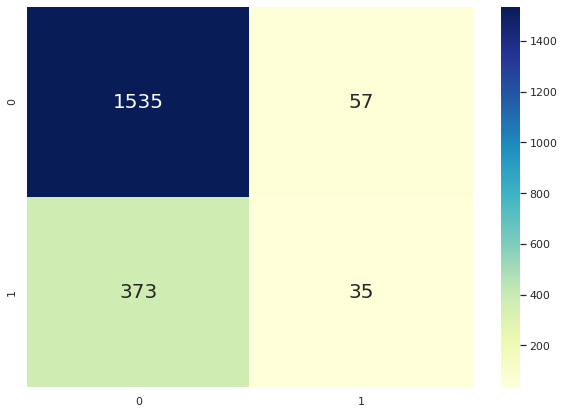

In [135]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sn
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
result = ((X_test.shape[0], (y_test == y_pred).sum()))
print("GNB result accuracy =  : ",str(100*result[1]/result[0])+ " %")
visualize_result(y_test,y_pred,"GNB")

## Logistic Regression

Good news! We're almost done. From this point you'll use Sklearn library for training your dataset, No need to reinvent the wheel üòéüòâ. Run logistic regression on your train dataset using Sklearn and report accuracy of model on the test.

For more information check following links:


1.   [Logistic Regression](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)

2. [Understanding Logistic Regression](https://www.geeksforgeeks.org/understanding-logistic-regression/)



Attention: As you know, logistic regression is not in your main course materials, so you need to do some researches to find how it works. Describe it in a paragraph or two. (bonus) 


<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=5>
I am going to discuss this topic in detail below:
</font>
</div>


<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=3>
Linear Regression is a commonly used to predicts continuous values. In simple words, it finds the best fitting line/plane that describes two or more variables.

On the other hand, Logistic Regression helps fundamentally in binary classification (separating discreet values).

the function in logistic regression is sigmoid or relu while linear regression uses linear function to predict the value.

Logistic regression is used when the response variable is categorical in nature. For instance, yes/no
Linear regression is used when your response variable is continuous. For instance, weight

Linear regression uses ordinary least squares method to minimise the errors and arrive at a best possible fit, while logistic regression uses maximum likelihood method.

</font>
</div>


In [136]:
from sklearn.linear_model import LogisticRegression

#### Evaluate Your model

logistic regression result accuracy =  :  78.4 %
f1_score for Logistic Regression is :0.07296137339055793%
recall_score for Logistic Regression is :0.041666666666666664%
precision_score for Logistic Regression is :0.29310344827586204%
              precision    recall  f1-score   support

     class 0       0.80      0.97      0.88      1592
     class 1       0.29      0.04      0.07       408

    accuracy                           0.78      2000
   macro avg       0.55      0.51      0.48      2000
weighted avg       0.70      0.78      0.71      2000



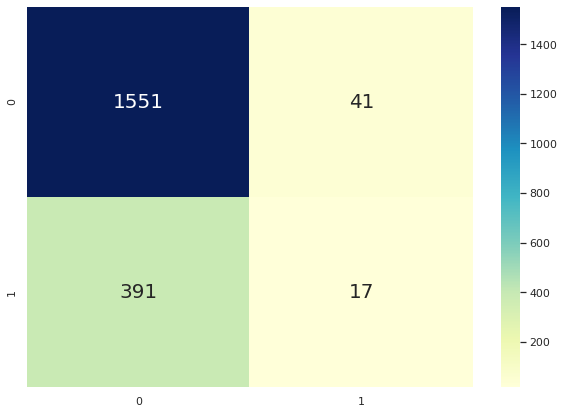

In [137]:
clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.fit(X_train, y_train).predict(X_test)
result = ((X_test.shape[0], (y_test == y_pred).sum()))
print("logistic regression result accuracy =  : ",str(100*result[1]/result[0])+ " %")
visualize_result(y_test,y_pred,"Logistic Regression")

## Random Forest

Let's grow seeds üå±üå≤

### Decision Tree


*  First you need to implement decision tree models

*  For this part you are allowed to use python libraries



#### Train Your Model

In [138]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree 
# Your Code Here

#### Evaluate Your model

DecisionTreeClassifier result accuracy =  :  84.15 %
f1_score for DecisionTreeClassifier is :0.41404805914972276%
recall_score for DecisionTreeClassifier is :0.27450980392156865%
precision_score for DecisionTreeClassifier is :0.8421052631578947%
              precision    recall  f1-score   support

     class 0       0.84      0.99      0.91      1592
     class 1       0.84      0.27      0.41       408

    accuracy                           0.84      2000
   macro avg       0.84      0.63      0.66      2000
weighted avg       0.84      0.84      0.81      2000



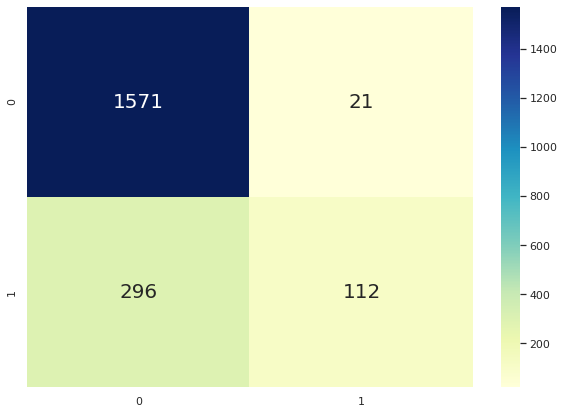

In [139]:
results = []
def decisionTreeClassifier(X_train,y_train,max_depth=3):
  clf = DecisionTreeClassifier(random_state=0,max_depth= max_depth)
  fited = clf.fit(X_train, y_train)
  return fited
fited = decisionTreeClassifier(X_train, y_train,3)
y_pred = fited.predict(X_test)
result = ((X_test.shape[0], (y_test == y_pred).sum()))
print("DecisionTreeClassifier result accuracy =  : ",str(100*result[1]/result[0])+ " %")
visualize_result(y_test,y_pred,"DecisionTreeClassifier")

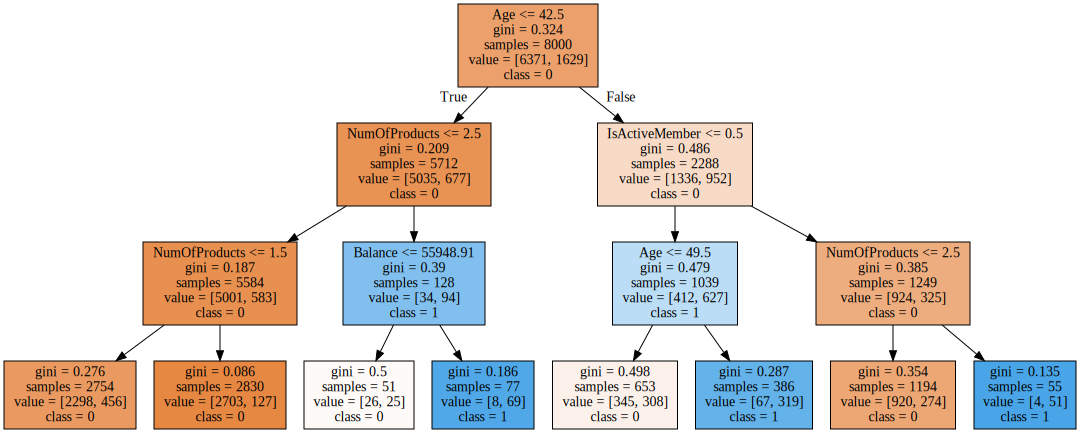

In [140]:
from sklearn import tree as t
dot_data = t.export_graphviz(fited, filled=True,feature_names = all_features,class_names = ["0","1"])
#Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph



<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
ÿØÿ±ÿÆÿ™ ÿ®ÿßŸÑÿß ŸÜÿ¥ÿßŸÜ ÿØŸáŸÜÿØŸá ÿ¢ŸÜ ÿßÿ≥ÿ™ ⁄©Ÿá ⁄©ÿØÿßŸÖ Ÿà€å⁄ò⁄Ø€å Ÿáÿß ÿßŸÜÿ™ÿÆÿßÿ® ÿ¥ÿØŸá ÿßŸÜÿØ  ÿ≤€åÿ± ÿØÿ±ÿÆÿ™ ÿ≥ŸÖÿ™ ⁄ÜŸæ ŸÜÿ¥ÿßŸÜ ÿØŸáŸÜÿØŸá ÿµÿ≠€åÿ≠ ÿ®ŸàÿØŸÜ ÿ¥ÿ±ÿ∑ ŸÖÿ∑ÿ±ÿ≠ ÿ¥ÿØŸá Ÿà ÿ≥ŸÖÿ™ ÿ±ÿßÿ≥ÿ™ ÿ∫ŸÑÿ∑ ÿ®ŸàÿØŸÜ ÿ¥ÿ±ÿ∑ ŸÖÿ∑ÿ±ÿ≠ ÿ¥ÿØŸá ÿßÿ≥ÿ™ ÿØÿ±ÿÆÿ™ ÿ≤€åÿ± ŸÜŸÖÿß€å€å ÿ®Ÿáÿ™ÿ± ÿ®ÿ±ÿß€å ÿ¢ŸÜ⁄ÜŸá ⁄©Ÿá ÿ±ÿÆ ÿØÿßÿØŸá ÿßÿ≥ÿ™ ÿ®Ÿá ŸÖÿß ŸÖ€å‚ÄåÿØŸáÿØ.
ÿØŸÇÿ™ ⁄©ŸÜ€åÿØ ⁄©Ÿá Ÿà€å⁄ò⁄Ø€å Ÿáÿß ÿ®ÿ± ÿ≠ÿ≥ÿ® ÿ¢ŸÜÿ™ÿ±ŸàŸæ€å ÿßŸÜÿ™ÿÆÿßÿ® ÿ¥ÿØŸá ÿßŸÜÿØ.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


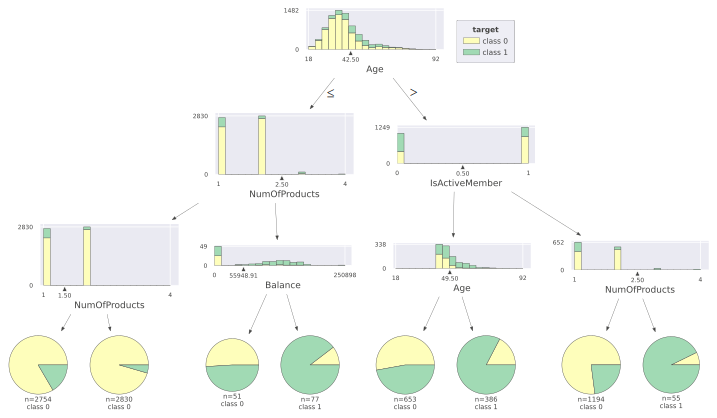

In [141]:

from dtreeviz.trees import dtreeviz 
viz = dtreeviz(fited, X_train,y_train,
                target_name="target",
                feature_names=all_features)
viz

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=€≥>
ŸáŸÖÿßŸÜÿ∑Ÿàÿ± ⁄©Ÿá ÿØÿ± ÿØÿ±ÿÆÿ™ ÿ®ÿßŸÑÿß ŸÖÿ¥ÿßŸáÿØŸá ŸÖ€å‚Äå⁄©ŸÜ€åÿØ ÿßŸàŸÑ€åŸÜ ŸÖÿπ€åÿßÿ± ÿ≥ŸÜ ⁄©Ÿá Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ ÿ¢ŸÜ ⁄©ÿ¥€åÿØŸá ÿ¥ÿØŸá ÿßÿ≥ÿ™ ÿ™ŸÖÿ±⁄©ÿ≤ ÿ™ÿπÿØÿßÿØ ⁄©ŸÑÿßÿ≥ Ÿáÿß€å ÿµŸÅÿ± ÿØÿ± ⁄©ŸÖÿ™ÿ± ÿßÿ≤ €¥€≤.€µ ÿßÿ≥ÿ™ ÿ≥Ÿæÿ≥ ÿØŸà ÿ≤€åÿ± ÿØÿ±ÿ≠ÿ™ ÿØÿßÿ±€åŸÖ ⁄©Ÿá Ÿáÿ± €å⁄© ÿ®ÿ± ÿ≠ÿ≥ÿ® ÿ™ÿπÿØÿßÿØ ŸÖÿ≠ÿµŸàŸÑ Ÿà ÿß€åŸÜ⁄©Ÿá ÿ¢€åÿß ŸÖŸÖÿ®ÿ± ŸÅÿπÿßŸÑ€å Ÿáÿ≥ÿ™ €åÿß ŸÜŸá ÿ™ŸÇÿ≥€åŸÖ ÿ¥ÿØŸá ÿßÿ≥ŸÜÿØ Ÿà ŸáŸÖ⁄ÜŸÜ€åŸÜ ÿ¥ÿßÿÆÿµ Ÿáÿ± ⁄©ÿØÿßŸÖ ŸÜÿ¥ÿßŸÜ ÿØÿßÿØŸá ÿ¥ÿØŸá ÿßÿ≥ÿ™.
Ÿà ÿ®ÿØ€åŸÜ ÿ™ÿ±ÿ™€åÿ® ÿ®ÿß ÿπŸÖŸÇ €≥ ÿØÿ±ÿÆÿ™ ÿ≥ÿßÿÆÿ™Ÿá ÿ¥ÿØŸá ÿßÿ≥ÿ™. 

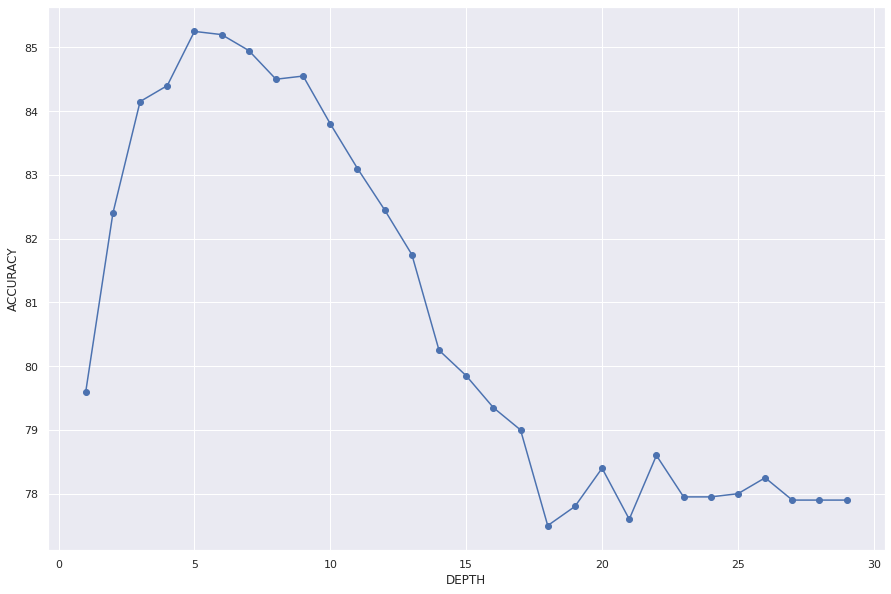

In [155]:
#compare different depth
def calculate_accuracy(depth):
  fited = decisionTreeClassifier(X_train, y_train,depth)
  y_pred = fited.predict(X_test)
  result =  ((X_test.shape[0], (y_test == y_pred).sum()))
  return 100*result[1]/result[0]

results = []
depth_range = range(1,30)
for depth in depth_range:
  results.append(calculate_accuracy(depth))
plt.figure(figsize=(15,10))
plt.ylabel("ACCURACY")
plt.xlabel("DEPTH")
plt.plot(depth_range, results, '-o')
plt.show()

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=€¥>
ŸáŸÖÿßŸÜÿ∑Ÿàÿ± ⁄©Ÿá ŸÖ€åÿ®€åŸÜ€åÿØ ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÜÿ™€åÿ¨Ÿá ÿØÿ± ÿπŸÖŸÇ5  ÿ®ÿØÿ≥ÿ™ ÿ¢ŸÖÿØŸá ÿßÿ≥ÿ™. 
ŸáŸÖ⁄ÜŸÜ€åŸÜ ÿ®ÿß ÿßŸÅÿ≤ÿß€åÿ¥ ÿπŸÖŸÇ ÿØŸÇÿ™ ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿ≤€åÿ±ÿß ÿ®ÿ±ÿß€å ÿß€åŸÜ⁄©Ÿá ÿßŸàÿ±ŸÅ€åÿ™ ŸÜÿ¥ŸàÿØ ŸÖÿØŸÑ ÿ®Ÿá ÿ±Ÿàÿ¥ Ÿáÿß€å Ÿæÿ±ŸàŸÜ ⁄©ÿ±ÿØŸÜ Ÿà ÿØ€å⁄Øÿ± ÿ±Ÿàÿ¥ Ÿáÿß€å ÿßŸàÿ±ŸÅ€åÿ™ ÿ¥ÿØŸÜ ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿ±Ÿà€å ÿ¢Ÿàÿ±ÿØŸá ÿ®ÿßÿ¥ÿØ.
ÿØŸÇÿ™ ⁄©ŸÜ€åÿØ ⁄©Ÿá ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿ®ÿß Ÿáÿ± ÿ®ÿßÿ± ÿ±ÿßŸÜ ⁄©ÿ±ÿØŸÜ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿπŸÖŸÇ ŸÖÿ™ŸÅÿßŸàÿ™ ÿ¥ŸàÿØ ÿ≤€åÿ±ÿß ÿØ€åÿ™ÿß ÿ¥ÿßŸÅŸÑ ŸÖ€å‚Äåÿ¥ŸàÿØ.

### Random Forest


* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
* Use your previous decision tree models to train random forest. Your are not allowed to use python libraries for random forest, but feel free to use libraries for decision trees you implemented in the previous part.

#### Train Your Model

In [167]:
def create_tree(d,depth):
  y_train  = d["Exited"]
  X_train = d.drop(columns=['Exited'])
  clf = DecisionTreeClassifier(random_state=0,max_depth= depth)
  fited = clf.fit(X_train, y_train)
  return fited
def create_jungle(depth = 5 ,number_of_tree = 12,shuffle = True):
  trees = []
  for i in range(number_of_tree//2):
    x1,x2 = train_test_split(train_set, train_size=0.5,test_size=0.5,shuffle = True)
    trees.append(create_tree(x1,depth))
    trees.append(create_tree(x2,depth))
    return trees

#### Evaluate Your model

forest result accuracy =  :  86.55 %
f1_score for forest is :0.6084425036390101%
recall_score for forest is :0.5122549019607843%
precision_score for forest is :0.7491039426523297%
              precision    recall  f1-score   support

     class 0       0.88      0.96      0.92      1592
     class 1       0.75      0.51      0.61       408

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



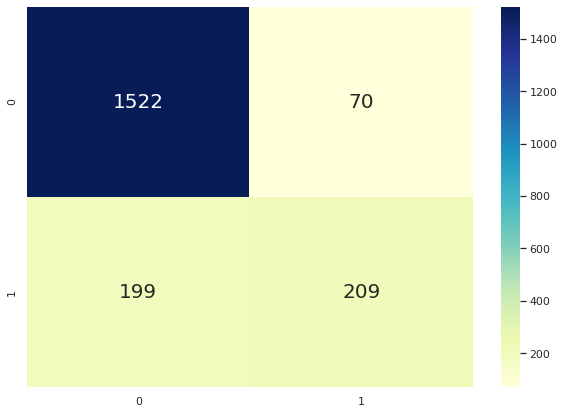

In [168]:
def predict_y(trees):
  predicts = []
  for tree in trees:
    predicts.append(tree.predict(X_test))
  y_pred = []
  size = len(predicts)
  for i in range(len(predicts[0])):
    temp = 0
    for j in range(size):
      temp +=predicts[j][i]
    y_pred.append(0 if temp/size < 0.5 else 1)
  result = ((X_test.shape[0], (y_test == y_pred).sum()))
  return 100*result[1]/result[0],y_pred
res,y_pred = predict_y(create_jungle(6,16))
print("forest result accuracy =  : ",str(res)+ " %")
visualize_result(y_test,y_pred,"forest")

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=€¥>
ÿßÿ≤ ŸÜÿ™€åÿ¨Ÿá ŸÇÿ≥ŸÖÿ™ ŸÇÿ®ŸÑ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ÿ±ÿØŸá Ÿà ÿπŸÖŸÇ €∂ ÿ±ÿß ÿ®ÿ±ÿß€å Ÿáÿ± ÿØÿ±ÿÆÿ™ ÿßÿ≥ÿ™ŸÅÿßÿØŸá ⁄©ÿ±ÿØŸá ÿß€åŸÖ.(ÿØŸÇÿ™ ⁄©ŸÜ€åÿØ ⁄©Ÿá ⁄ÜŸàŸÜ ÿØ€åÿ™ÿß ÿ¥ÿßŸÅŸÑ ŸÖ€å‚Äåÿ¥ŸàÿØ ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿß€åŸÜ ÿπŸÖŸÇ ŸÖÿ™ŸÅÿßŸàÿ™ ÿ¥ŸàÿØ ÿ®ÿß Ÿáÿ± ÿ®ÿßÿ± ÿ±ÿßŸÜ ⁄©ÿ±ÿØŸÜ) 
ÿ™ÿπÿØÿßÿØ ÿØÿ±ÿÆÿ™ Ÿáÿß ŸÜ€åÿ≤ ÿ®ÿß ÿ™Ÿàÿ¨Ÿá ÿ®Ÿá ÿ™ÿπÿØÿßÿØ Ÿà€å⁄ò⁄Ø€å Ÿáÿß Ÿà ÿ¢ÿ≤ŸÖŸàÿØŸÜ Ÿáÿß€å ŸÖÿÆÿ™ŸÑŸÅ 16 ÿ™ÿπÿØÿßÿØ ŸÖŸÜÿßÿ≥ÿ®€å ÿßÿ≥ÿ™ .
ÿØÿ± ŸÇÿ≥ŸÖÿ™ ÿ≤€åÿ± ŸÜ€åÿ≤ ÿπŸÖŸÑ⁄©ÿ±ÿØ ÿ¨ŸÜ⁄ØŸÑ ÿ±ÿß ÿ®ÿß ÿπŸÖŸÇ Ÿáÿß€å ŸÖÿ™ŸÅÿßŸàÿ™ ÿ®ÿ±ÿ±ÿ≥€å ⁄©ÿ±ÿØŸá ÿß€åŸÖ.

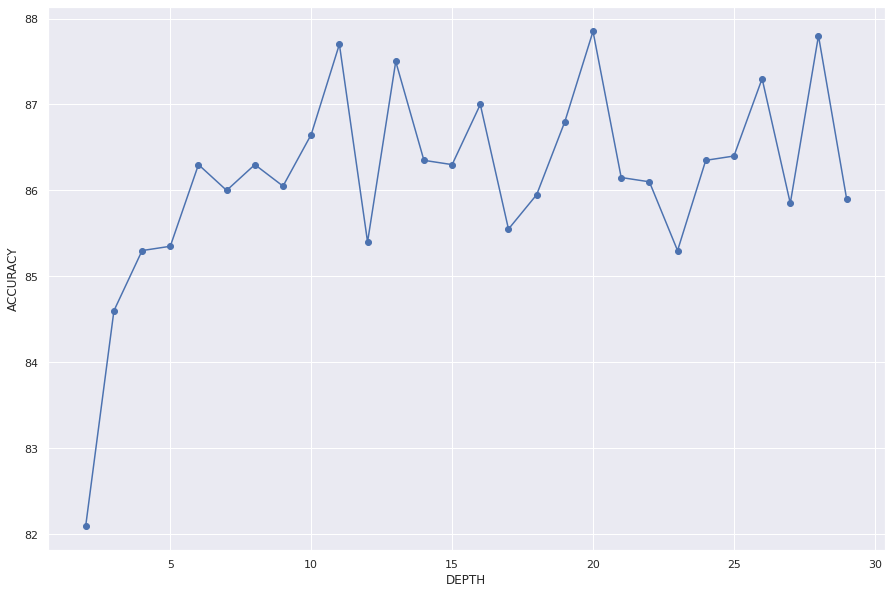

In [178]:
results = []
depth_range = range(2,30)
for depth in depth_range:
  res,_ = predict_y(create_jungle(depth,16,True))
  results.append(res)
plt.figure(figsize=(15,10))
plt.ylabel("ACCURACY")
plt.xlabel("DEPTH")
plt.plot(depth_range, results, '-o')
plt.show()